In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
%matplotlib inline


In [19]:
# df = pd.read_excel("combinedData.xlsx")
dfTest = pd.read_csv('rawData.csv')
df = pd.read_csv('Fortnite.csv')
df = df.rename(index=str, columns={"Which quadrant did you land in? Use map below for reference": "Location", "Which game mode were you in?": "Mode","What place did you finish? (Example: 4)": "Position", "How many kills did you get? (Example: 7)": "KillCount"})

In [20]:
df.head()

,Timestamp,Location,Mode,Position,KillCount
0,2018/03/05 7:16:09 PM EST,D5,Solo,6,8
1,2018/03/05 7:43:32 PM EST,G2,Solo,1,3
2,2018/03/05 7:44:48 PM EST,F8,Solo,6,3
3,2018/03/05 8:00:04 PM EST,D10,Solo,60,1
4,2018/03/05 8:00:05 PM EST,G8,Solo,1,8


In [21]:
df = df.drop('Timestamp', axis = 1)

In [22]:
df.isnull().any()

Location     False
Mode         False
Position     False
KillCount    False
dtype: bool

In [23]:
df.Mode.replace(to_replace=dict(SOLO=0, DUO=1, SQUAD=2, Solo=0, Duo =1, Squad = 2), inplace=True)
dfTest.Mode.replace(to_replace=dict(SOLO=0, DUO=1, SQUAD=2, Solo=0, Duo =1, Squad = 2), inplace=True)

In [24]:
df = df[["Location", "KillCount", "Position", "Mode"]]

# df["KillCount"] = np.cos(2*np.pi*df.KillCount/100)
# df["Position"] = np.cos(2*np.pi*df.Position/100)
# df["Mode"] =  np.cos(2*np.pi*df.Position/3)

In [25]:
df.loc[df["KillCount"] > 82]

,Location,KillCount,Position,Mode


In [26]:
df3 = pd.concat([df, dfTest])

In [27]:
df =df3

In [28]:
df=df.drop([20])

In [29]:
df.loc[df['Mode'] == "SQUAD "]
df.loc[df["Position"] > 82]

,Location,KillCount,Position,Mode
132,D5,3,85,1
204,A3,0,99,1
205,B7,0,99,1
432,E4,0,88,0
617,D5,3,85,1
689,A3,0,99,1
690,B7,0,99,1
753,A5,2,99,0
920,E4,0,88,0
955,C3,1,93,0


In [30]:
df.head(10)

,Location,KillCount,Position,Mode
0,D5,8,6,0
1,G2,3,1,0
2,F8,3,6,0
3,D10,1,60,0
4,G8,8,1,0
5,B2,5,1,0
6,H4,7,1,2
7,G6,5,6,0
8,G4,5,1,0
9,H6,19,1,2


(-1, 10)

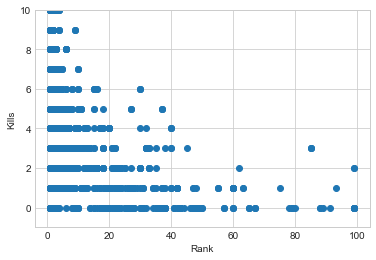

In [31]:
import seaborn as sns
sns.set_style(style = "whitegrid")
plt.scatter((df["Position"]),(df["KillCount"]))
# plt.ylabel()
plt.xlabel("Rank")
plt.ylabel("Kills")
plt.ylim(-1,10)



In [32]:
df=df.drop([76])

Text(0.5,0,'Mode')

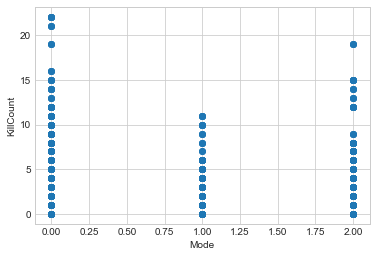

In [33]:
plt.scatter(df["Mode"], df["KillCount"])
plt.ylabel("KillCount")
plt.xlabel("Mode")

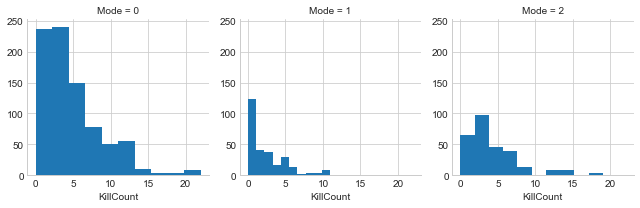

In [34]:
sns.set_style("whitegrid")
multiples = sns.FacetGrid(df, col = "Mode")
multiples = multiples.map(plt.hist, "KillCount")

Text(0.5,0,'Location')

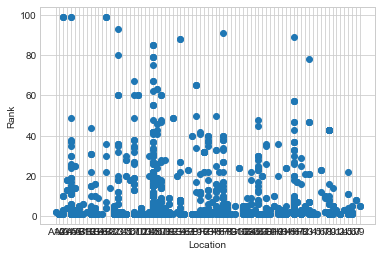

In [35]:
plt.scatter( df["Location"],df["Position"])
plt.ylabel("Rank")
plt.xlabel("Location")

In [36]:
df.describe()

,KillCount,Position
count,1397.000000,1397.000000
mean,4.236936,10.346457
std,3.717512,16.591250
min,0.000000,1.000000
25%,2.000000,1.000000
50%,3.000000,3.000000
75%,6.000000,12.000000
max,22.000000,99.000000


In [37]:
# multiples = sns.FacetGrid(df, col = "Location")
# multiples = multiples.map(plt.hist, "Position")

In [38]:
X = df["KillCount"]
Y = df["Position"]

# m1 = sm.OLS(Y,X).fit()

# fig, ax = plt.subplots(figsize=(15,10))
# fig = sm.graphics.plot_fit(m1, 0, ax=ax)


In [39]:
import sklearn.cross_validation
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X,Y, test_size = 0.2, random_state = 5) 

/Users/shivanikohli/Documents/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [40]:
from scipy.optimize import curve_fit

In [41]:
def func(x, a, b, c):
    d  = np.array(a * np.exp(-b * x) + c, dtype=np.float64)
    return d

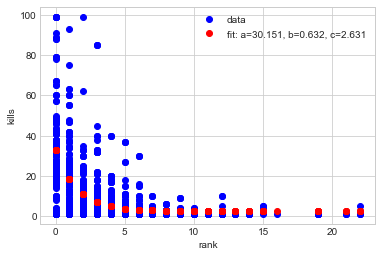

In [42]:
plt.plot(X_train, Y_train, 'bo', label='data')
popt, pcov = curve_fit(func, X_train, Y_train)
plt.plot(X_train, func(X_train, *popt), 'ro',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))


plt.xlabel('rank')
plt.ylabel('kills')
plt.legend()
plt.show()

In [43]:
popt

array([30.1513328 ,  0.63233632,  2.6310829 ])

In [44]:
yhat = popt[2]+ popt[0]*np.exp(-popt[1] * X_test)

In [45]:
np.mean(yhat)

10.146345768459597

In [45]:
res = yhat -Y_test

In [46]:
np.mean(res)

-0.2457426147272241

(-1, 50)

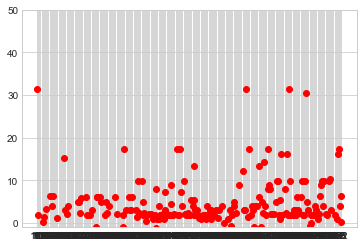

In [47]:
plt.plot(res,'ro')
plt.ylim(-1,50)

In [48]:
relativeRes = res/Y_test

(-1, 1.5)

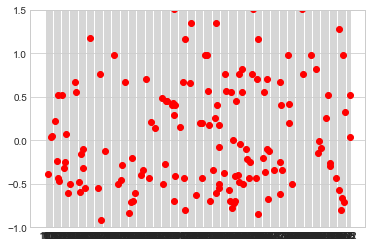

In [49]:
plt.plot(relativeRes,'ro')
plt.ylim(-1,1.5)

In [50]:
np.mean(relativeRes)

2.292772407848187

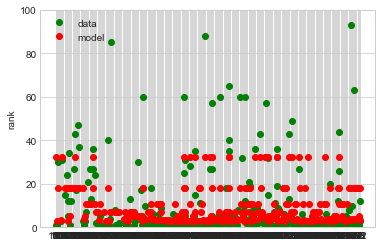

In [51]:
plt.plot(Y_test, 'go', label = 'data')
plt.plot(yhat, 'ro', label = 'model')
plt.ylim(0,100)
plt.ylabel('rank')
plt.legend()

In [33]:
np.max(yhat)

32.394044518976855